## Does the distance to destination influence profits?

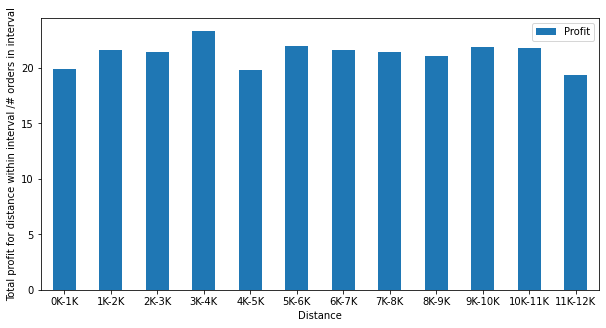

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path_to_dataset = '/Users/mihaithpc/Desktop/Europe_Datathon/'
df = pd.read_csv(path_to_dataset + "DataAfterFE_310_3.csv", index_col=[0])

a = []
b = []
for i in range(0, 12000, 1000):
    temp = df.loc[(df['Distance'] >= i) & (df['Distance'] < i + 1000)]
    a.append(str(int(i/1000)) + 'K-' + str(int(1+i/1000))+'K')
    b.append(temp['Order Profit'].sum() / len(temp))
x = pd.DataFrame({'Profit': b}, index=a)
x.plot.bar(rot=0, figsize=(10,5))
plt.xlabel("Distance")
plt.ylabel("Total profit for distance within interval /# orders in interval")
plt.savefig("distance_profit.svg")

# Which groups of customers contributed most to the profits

<AxesSubplot:xlabel='Customer Segment'>

<Figure size 864x432 with 0 Axes>

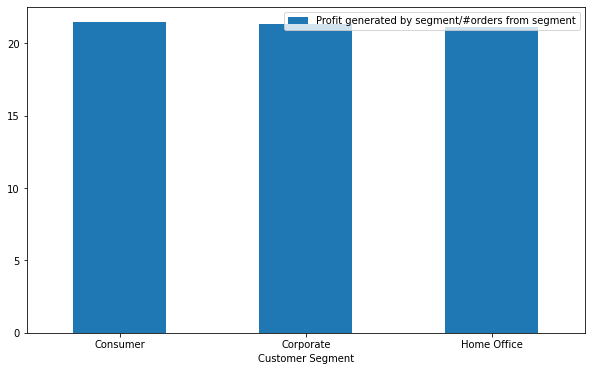

In [3]:
a = df.loc[(df['Consumer'] == 1) ]
b = df.loc[(df['Corporate'] == 1) ]
c = df.loc[(df['Home Office'] == 1)]
dff = pd.DataFrame({'Customer Segment':['Consumer', 'Corporate', 'Home Office'], 
                    'Profit generated by segment/#orders from segment': [a['Order Profit'].sum() / len(a),
                                                   b['Order Profit'].sum() / len(b),
                                                  c['Order Profit'].sum() / len(c)]})
fig = plt.figure(figsize=(12,6))
dff.plot.bar(x='Customer Segment', y='Profit generated by segment/#orders from segment', rot=0, figsize=(10,6))